<a href="https://colab.research.google.com/github/lauBit/ML-taller2/blob/main/Prueba_2_taller2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')


In [ ]:
# Seleccionar características y variable objetivo
X = data[['age', 'ejection_fraction', 'serum_creatinine']]
y = data['DEATH_EVENT']

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

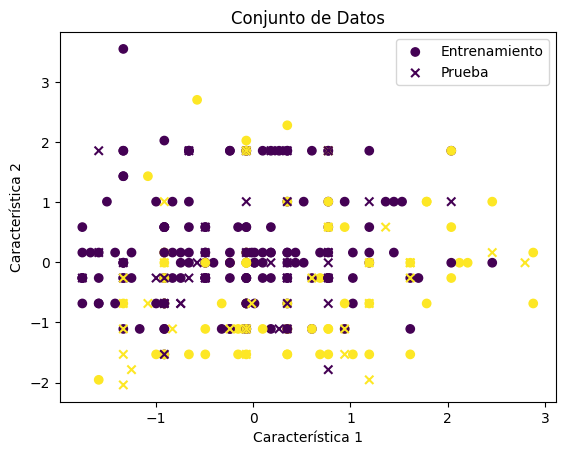

In [ ]:
import matplotlib.pyplot as plt

# Visualizar los datos de entrenamiento y prueba
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Entrenamiento')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Prueba')

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Datos')
plt.legend()
plt.show()

In [ ]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

Perceptron()

In [ ]:
clf.score(X, y)

0.6321070234113713

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
score = clf.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {score}")


Precisión en el conjunto de prueba: 0.5866666666666667


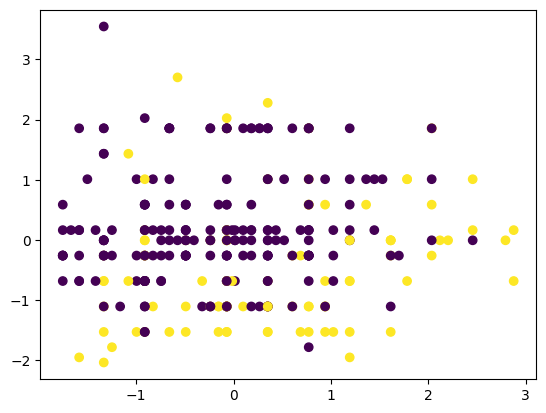

In [ ]:
import matplotlib.pyplot as plt

#clasificar la muestras para mejorar la precisión
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

#divide múltiples subconjuntos y calcular el rendimiento
scores = cross_val_score(clf, X, y, cv=5)
print(f"Precisión media con validación cruzada: {scores.mean()}")


Precisión media con validación cruzada: 0.6918079096045198


In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
clf = Perceptron(tol=1e-3, max_iter=1000, eta0=1.0, random_state=0)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(f"Precisión ajustada: {score}")


Precisión ajustada: 0.6266666666666667


In [ ]:
#Para mejorar la precisión, se usa GridSearchCV para encontrar los mejores hiperparámetros

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_iter': [500, 1000, 1500],
    'eta0': [0.1, 0.01, 1.0],
    'penalty': [None, 'l2', 'l1', 'elasticnet']
}

grid_search = GridSearchCV(Perceptron(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor precisión: {grid_search.best_score_}")


Mejores parámetros: {'eta0': 1.0, 'max_iter': 500, 'penalty': None}
Mejor precisión: 0.7448484848484849


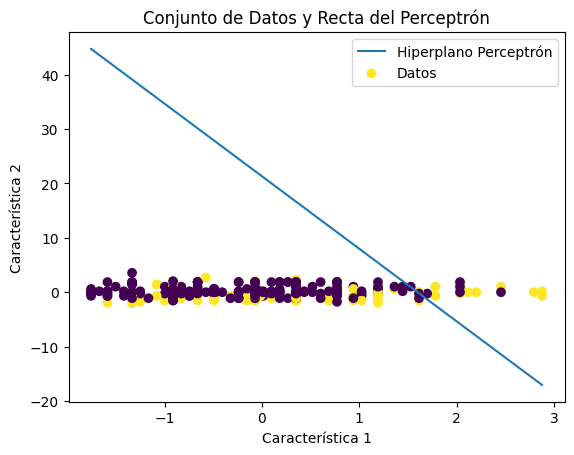

In [ ]:
# Obtener los coeficientes del hiperplano (recta) del perceptrón
w = clf.coef_[0]
b = clf.intercept_[0]

# Crear una línea que represente el hiperplano
x_values = [min(X[:, 0]), max(X[:, 0])]
y_values = [-(w[0] * x + b) / w[1] for x in x_values]

# Dibujar la línea
plt.plot(x_values, y_values, label='Hiperplano Perceptrón')

# Mostrar la gráfica con los datos y la línea
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', label='Datos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Datos y Recta del Perceptrón')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X, y)

LogisticRegression(random_state=0)

In [ ]:
clf.score(X, y)

0.7692307692307693

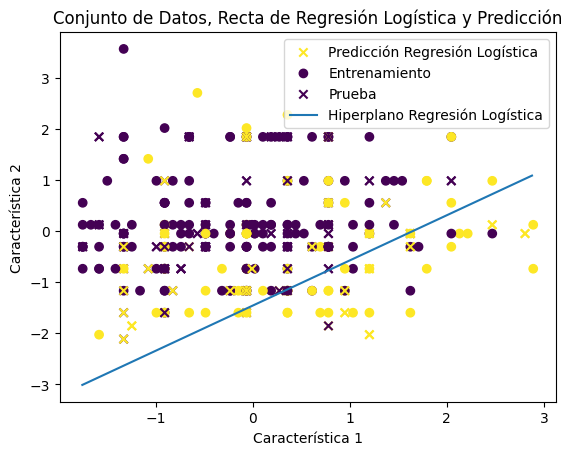

In [ ]:
# Crear un modelo de regresión logística
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = clf.predict(X_test)

# Dibujar los datos de prueba con la predicción
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', label='Predicción Regresión Logística')

# Mostrar la gráfica con los datos, la recta del perceptrón y la predicción
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Entrenamiento')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Prueba')

# Obtener los coeficientes del hiperplano (recta) del perceptrón
w = clf.coef_[0]
b = clf.intercept_[0]

# Crear una línea que represente el hiperplano
x_values = [min(X[:, 0]), max(X[:, 0])]
y_values = [-(w[0] * x + b) / w[1] for x in x_values]

# Dibujar la línea
plt.plot(x_values, y_values, label='Hiperplano Regresión Logística')


plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Datos, Recta de Regresión Logística y Predicción')
plt.legend()
plt.show()

In [ ]:
print(data)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Seleccionar características y variable objetivo
X = data[['age', 'ejection_fraction', 'serum_creatinine']]
y = data['DEATH_EVENT']

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear un modelo de Adaline (regresión lineal)
adaline = LinearRegression()
adaline.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = adaline.predict(X_test)

# Convertir las predicciones a etiquetas binarias (0 o 1)
y_pred_binary = np.where(y_pred > 0.5,1,0)

# Calcular la precisión del modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_binary)
print("Precisión del modelo Adaline:", accuracy)

# Puedes agregar más métricas como la matriz de confusión o el AUC si lo deseas

Precisión del modelo Adaline: 0.64
